# Файл с тредами, начинающимися с вопросов 

In [3]:
import pandas as pd
import numpy as np
import json


In [4]:
with open('./src/questions_threads_tenzorflow.jsonl', 'r') as f:
    data = f.readlines()

questions = []
for d in data:
    d = d.strip()
    if d:
        thread = json.loads(d)
        for m in thread['comments']:
            m['thread_id'] = thread['thread_id']
            questions.append(m)

df = pd.DataFrame(questions)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head(10)

,message,timestamp,author,thread_id
0,Could you do the one in conv_ops.cc as well? \...,2016-05-09 21:53:57+00:00,MDQ6VXNlcjE1NzM2OTEw,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDYyNTc5Nzkw
1,Done. Can't say I wasn't consistent!\n,2016-05-09 21:59:27+00:00,MDQ6VXNlcjQ2MzczNw==,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDYyNTc5Nzkw
2,alignment is messed up here -- this seems unre...,2016-05-28 20:29:37+00:00,MDQ6VXNlcjQ2MzczNw==,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDY0OTkzODEy
3,What does this bit do?\n,2016-11-15 00:55:34+00:00,MDQ6VXNlcjcwNTEx,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg3OTI4MTM2
4,I grabbed this from the GIF tests in python/op...,2016-11-15 01:08:01+00:00,MDQ6VXNlcjExNjA3MjA1,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg3OTI4MTM2
5,"Just to confirm, are float types the only type...",2016-09-13 22:08:44+00:00,MDQ6VXNlcjMzNzY4MTc=,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDc4NjUzOTcz
6,"Nevermind, just saw your other reply, thanks.\n",2016-09-13 22:09:36+00:00,MDQ6VXNlcjMzNzY4MTc=,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDc4NjUzOTcz
7,"vrv@, ebrevdo@ - does it make a difference whe...",2016-11-03 21:08:27+00:00,MDQ6VXNlcjE0NDExNA==,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg2NDQzNzYw
8,If we want to use a function to handle this ca...,2016-11-04 01:14:00+00:00,MDQ6VXNlcjE2OTQzMzUz,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg2NDQzNzYw
9,i believe zeros_initializer was recently conve...,2016-11-30 04:57:30+00:00,MDQ6VXNlcjE3OTQ3MTU=,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg2NDQzNzYw


In [5]:
df['odds'] = df.groupby('thread_id')['timestamp'].diff()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,message,timestamp,author,thread_id,odds
0,Could you do the one in conv_ops.cc as well? \...,2016-05-09 21:53:57+00:00,MDQ6VXNlcjE1NzM2OTEw,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDYyNTc5Nzkw,NaT
1,Done. Can't say I wasn't consistent!\n,2016-05-09 21:59:27+00:00,MDQ6VXNlcjQ2MzczNw==,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDYyNTc5Nzkw,0 days 00:05:30
2,alignment is messed up here -- this seems unre...,2016-05-28 20:29:37+00:00,MDQ6VXNlcjQ2MzczNw==,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDY0OTkzODEy,NaT
3,What does this bit do?\n,2016-11-15 00:55:34+00:00,MDQ6VXNlcjcwNTEx,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg3OTI4MTM2,NaT
4,I grabbed this from the GIF tests in python/op...,2016-11-15 01:08:01+00:00,MDQ6VXNlcjExNjA3MjA1,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg3OTI4MTM2,0 days 00:12:27
...,...,...,...,...,...
996,> @tf-security-autoupdate-bot @tensorflow-jenk...,2024-01-04 18:01:10+00:00,MDQ6VXNlcjUyNjc0OTM1,PRRC_kwDOArmXAs5V8y-6,0 days 00:00:32
997,\r\n\r\n\r\n> Is this true for XLA as well?\r\...,2024-01-05 10:46:54+00:00,U_kgDOBur8Og,PRRC_kwDOArmXAs5V8y-6,0 days 16:45:44
998,"Right, so this added comment is not always tru...",2024-01-05 18:28:29+00:00,MDQ6VXNlcjI1Mzg3Mzk=,PRRC_kwDOArmXAs5V8y-6,0 days 07:41:35
999,"@cantonios , Updated the XLA behaviour as sugg...",2024-01-07 13:43:15+00:00,U_kgDOBur8Og,PRRC_kwDOArmXAs5V8y-6,1 days 19:14:46


/tmp/ipykernel_11208/224472239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours'] = (df['odds'].dt.total_seconds())/ 3600


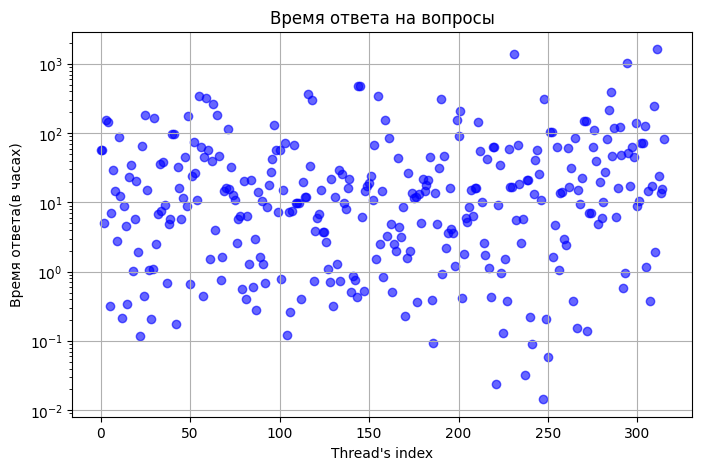

In [6]:
import matplotlib
import matplotlib.pyplot as plt

df = df.dropna(axis=0)
df['hours'] = (df['odds'].dt.total_seconds())/ 3600
stat = df.groupby('thread_id')['hours'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.title('Время ответа на вопросы')
plt.grid()
plt.scatter(x = stat.index, y = stat['hours'], color = 'blue', alpha = 0.6 )
plt.ylabel('Время ответа(в часах)')
plt.xlabel("Thread's index")
plt.yscale('log')


In [7]:
st = df.groupby('thread_id')['odds'].max().reset_index()

print('Среднее значение: {}'.format(st['odds'].mean()))
print('Медиана: {}'.format(st['odds'].describe()['50%']))
print('Q1 значения ниже которого находятся 25%: {}'.format(st['odds'].describe()['25%']))
print('Q3 значения ниже которого находятся 75%: {}'.format(st['odds'].describe()['75%']))


Среднее значение: 3 days 03:54:50.816455696
Медиана: 0 days 16:19:03.500000
Q1 значения ниже которого находятся 25%: 0 days 02:44:11.250000
Q3 значения ниже которого находятся 75%: 2 days 20:00:39.500000


### Среднее значение: 3 days 03:54:50.816455696
### Медиана: 0 days 16:19:03.500000
### Q1 значения ниже которого находятся 25%: 0 days 02:44:11.250000
### Q3 значения ниже которого находятся 75%: 2 days 20:00:39.500000

## Без подтверждения ответа автора вопроса

In [8]:
_df = pd.DataFrame(questions)
_df['message'].str.strip()
_df['timestamp'] = pd.to_datetime(_df['timestamp'])
_df = _df[_df['message'] != 'Done']
_df['odds'] = _df.groupby('thread_id')['timestamp'].diff()


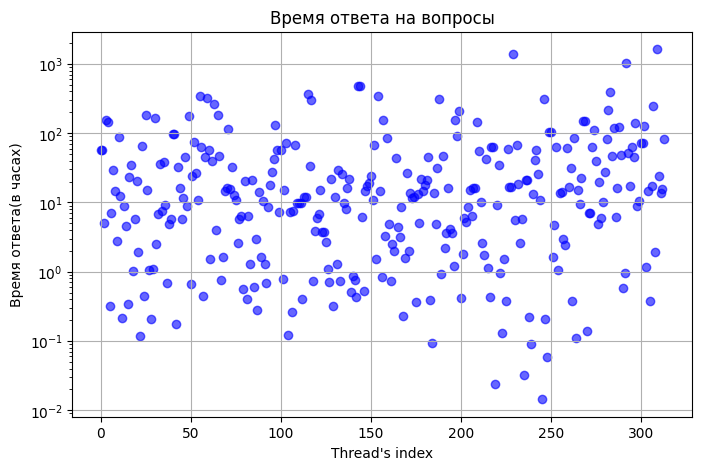

In [7]:
_df = _df.dropna(axis=0)
_df['hours'] = _df['odds'].dt.total_seconds() / 3600
st = _df.groupby('thread_id')['hours'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.title('Время ответа на вопросы')
plt.grid()
plt.scatter(x = st.index, y = st['hours'], color = 'blue', alpha = 0.6 )
plt.ylabel('Время ответа(в часах)')
plt.xlabel("Thread's index")
plt.yscale('log')

In [ ]:
_st = _df.groupby('thread_id')['odds'].max().reset_index()

print('Среднее значение: {}'.format(_st['odds'].mean()))
print('Медиана: {}'.format(_st['odds'].describe()['50%']))
print('Q1 значения ниже которого находятся 25%: {}'.format(_st['odds'].describe()['25%']))
print('Q3 значения ниже которого находятся 75%: {}'.format(_st['odds'].describe()['75%']))


### Среднее значение: 3 days 04:19:32.066878980
### Медиана: 0 days 16:19:03.500000
### Q1 значения ниже которого находятся 25%: 0 days 02:49:21
### Q3 значения ниже которого находятся 75%: 2 days 20:27:18.500000

# Файл со всеми тредами

In [ ]:
with open('./src/threads.jsonl', 'r') as f:
    data = f.readlines()

questions = []
for d in data:
    d = d.strip()
    if d:
        thread = json.loads(d)
        for m in thread['comments']:
            m['thread_id'] = thread['thread_id']
            questions.append(m)

df2 = pd.DataFrame(questions)
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['message']= df2['message'].str.strip()
df2

In [ ]:
ids = df2[df2['message'].str.find("?") >= 0]['thread_id'].unique()
df3 = df2[df2['thread_id'].isin(ids)]
df3

In [ ]:
df3.loc[:, ['odds']] = df3.groupby('thread_id')['timestamp'].diff()
df3.head(20)

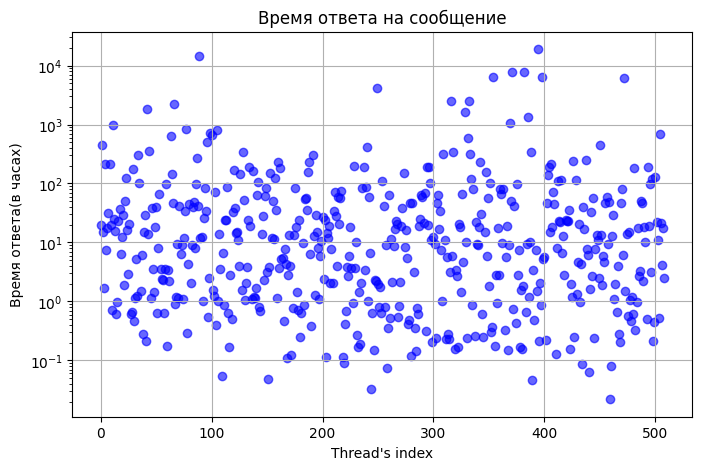

In [16]:
df3 = df3.dropna(axis=0)
df3.loc[:, ['hours']] = df3['odds'].dt.total_seconds() / 3600
st3 = df3.groupby('thread_id')['hours'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.title('Время ответа на сообщение')
plt.grid()
plt.scatter(x = st3.index, y = st3['hours'], color = 'blue', alpha = 0.6 )
plt.ylabel('Время ответа(в часах)')
plt.xlabel("Thread's index")
plt.yscale('log')

In [17]:
ans = df3.groupby('thread_id')['odds'].mean().reset_index()

In [ ]:
print('Среднее значение: {}'.format(ans['odds'].mean()))
print('Медиана: {}'.format(ans['odds'].describe()['50%']))
print('Q1 значения ниже которого находятся 25%: {}'.format(ans['odds'].describe()['25%']))
print('Q3 значения ниже которого находятся 75%: {}'.format(ans['odds'].describe()['75%']))


### Среднее значение: 8 days 22:39:45.497968436

### Медиана: 0 days 09:13:21
### Q1 значения ниже которого находятся 25%: 0 days 01:11:50
### Q3 значения ниже которого находятся 75%: 1 days 21:37:59.166666666

In [12]:
_df[['message', 'thread_id']]

,message,thread_id
0,Could you do the one in conv_ops.cc as well? \...,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDYyNTc5Nzkw
1,Done. Can't say I wasn't consistent!\n,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDYyNTc5Nzkw
2,alignment is messed up here -- this seems unre...,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDY0OTkzODEy
3,What does this bit do?\n,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg3OTI4MTM2
4,I grabbed this from the GIF tests in python/op...,MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDg3OTI4MTM2
...,...,...
996,> @tf-security-autoupdate-bot @tensorflow-jenk...,PRRC_kwDOArmXAs5V8y-6
997,\r\n\r\n\r\n> Is this true for XLA as well?\r\...,PRRC_kwDOArmXAs5V8y-6
998,"Right, so this added comment is not always tru...",PRRC_kwDOArmXAs5V8y-6
999,"@cantonios , Updated the XLA behaviour as sugg...",PRRC_kwDOArmXAs5V8y-6
